# Metodo di Eulero

Il metodo di Eulero è un metodo numerico per l'approssimazione delle soluzioni di equazioni differenziali. Prima di definire i passi dell'algoritmo, vediamone un semplice esempio.

## Esempio di risoluzione

Consideriamo il problema di Cauchy dato da $\begin{cases} y' = y \\ y(0) = 1 \end{cases}$; la soluzione è la funzione esponenziale $y(x) = e^x$, avente il seguente grafico:

In [1]:
%matplotlib inline

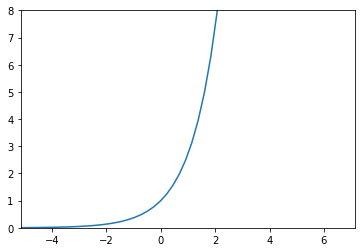

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-20, 3, 100)
y = np.exp(x)

def setAxis():
    plt.axis('equal')
    plt.xlim(-1, 3)
    plt.ylim(0, 8)

setAxis()
plt.plot(x, y)

Iniziamo ora ad approssimare la soluzione di questo problema di Cauchy: chiameremo $u_i$ l'approssimazione della funzione $y$ nel punto $i$. Definiamo inoltre un *passo* $h$: per semplicità lo poniamo uguale ad $1$, anche se passi più piccoli danno approssimazioni più precise.

Iniziamo dal punto $x = 0$: per questo punto sappiamo già il valore della funzione ignota $y$, in quanto ci è dato dalla condizione iniziale $y(0) = 1$. Il valore dell'approssimazione sarà quindi anche esso $u_0 = y(0) = 1$. Inoltre, siccome $y' = y$ avremo che $y'(0) = y(0) = u_0 = 1$.

Il punto principale del metodo di Eulero consiste nel prossimo passaggio: supponiamo (approssimando) che nell'intervallo $[0, 0+ h]$ (cioè nell'intervallo $[0, 1]$) la derivata della funzione sia costante, cioè che la funzione sia una retta. Tale retta passa per il punto $(0, 1)$ e ha pendenza $1$: è dunque la retta $x + 1$ e pertanto nel punto $x = 1$ vale $2$. La funzione approssimata $u$ varrà quindi $2$ nel punto $x = 1$.

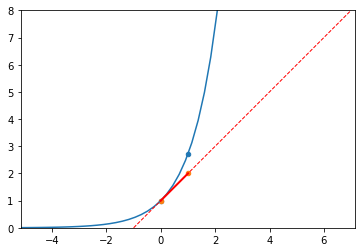

In [3]:
setAxis()
plt.plot(x, y)

approxPoints = [(0, 1), (1, 2)]
actualPoints = [(x, np.exp(x)) for x in range(0, 2)]

# transforms a list of points into a list with two lists, 
#   the first containing the x-values and the second with the ys
def pointListToXYLists(points):
    return list(zip(*points))

def plotApproximation():
    plt.scatter(*pointListToXYLists(actualPoints), s=20)
    plt.scatter(*pointListToXYLists(approxPoints), s=20)
    
    # printing all the approximation segments
    for i in range(0, len(approxPoints)-1):
        # used to transform a list of points into two lists (as before)
        # every segment is between points i and i+1
        toPlot = pointListToXYLists(approxPoints[i:i+2])
        plt.plot(*toPlot, color='r', linewidth=2)

    # printing the last segment's slope
    plt.axline(*approxPoints[-2:], color='r', linestyle='--', linewidth=1)

plotApproximation()

Reiteriamo il procedimento a partire dal punto $(x, u_x) = (1, 2)$. Questa volta non conosciamo il valore di $y(1)$, quindi lo sostituiamo con il valore approssimato $u_1 = 2$. Per lo stesso ragionamento di prima avremo quindi che $y'(1) = y(1) \approx u_1 = 2$, e quindi possiamo supporre approssimativamente che la funzione abbia derivata costantemente uguale a $2$ nell'intervallo $[1, 1+h] = [1,2]$.

Il secondo segmento passerà quindi per il punto $(1, 2)$ e avrà pendenza $2$, dunque sarà un segmento della retta $2x$. Ciò significa che la prossima approssimazione per la funzione sarà il punto $(x, u_x) = (2, 4)$.

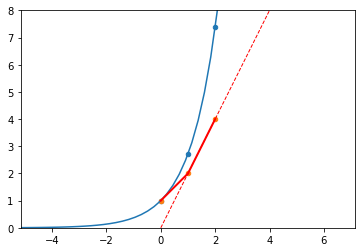

In [4]:
setAxis()
plt.plot(x, y)

approxPoints = approxPoints + [(2, 4)]
actualPoints = actualPoints + [(2, np.exp(2))]

plotApproximation()

Facendo un terzo passo allo stesso modo otterremmo il punto $(3, 8)$, e così via.

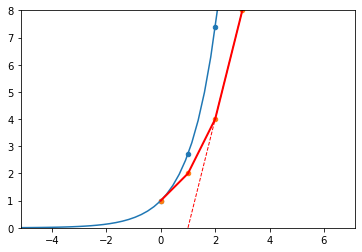

In [5]:
setAxis()
plt.plot(x, y)

approxPoints = approxPoints + [(3, 8)]
actualPoints = actualPoints + [(3, np.exp(3))]

plotApproximation()

## Teoria del metodo di Eulero

Sia $y' = f(t, y)$ una equazione differenziale del primo ordine con condizione iniziale $y(t_0) = y_0$ e sia $h$ il passo di approssimazione. Il metodo di Eulero consiste nel costruire la successione $(u_i)_{i \in \mathbb{N}}$ tale che i punti $(t_i, u_i)$ approssimino la soluzione $y$ del problema di Cauchy dato.

La successione trovata dal metodo di Eulero è data da $$\begin{cases} u_0 = y_0\\ u_{i+1} = u_i + h\cdot f(t_i, u_i) \end{cases}$$

Il ragionamento è il seguente:
- dato un qualsiasi punto $t_i$ vale che $$y'(t_i) \approx \frac{y(t) - y(t_i)}{t-t_i}$$ se $t - t_i$ è sufficientemente piccolo;
- in un intorno di $t_i$ possiamo quindi approssimare $$y(t) \approx y'(t_i)(t - t_i) + y(t_i);$$
- in particolare quindi l'approssimazione vale nel punto $t_{i+1}$ (poiché abbiamo supposto che $t_{i+1} - t_i = h$ sia sufficientemente piccolo), da cui $$y(t_{i+1}) \approx y'(t_{i})(t_{i+1} - t_i) + y(t_i) = y(t_i) + hy'(t_{i});$$
- per l'equazione differenziale data, questo è equivalente a dire che $$y(t_{i+1}) \approx y(t_i) + hf(t_i, y(t_i)).$$

A questo punto possiamo costruire la successione $u$ induttivamente:
- **caso base**: definisco $u_0 = y(t_0)$ (lo conosco poiché è dato dalla condizione iniziale);
- **passo induttivo**: devo approssimare $y(t_{i+1})$ supponendo di saper approssimare $y(t_i)$ (ovvero supponendo di conoscere $u_i$). Per l'approssimazione ricavata prima sappiamo che $$y(t_{i+1}) \approx y(t_i) + hf(t_i, y(t_i));$$ siccome non conosciamo $y(t_i)$ ma conosciamo la sua approssimazione $u_i$ possiamo sostituirlo, ottenendo $$u_{i+1} = u_i + hf(t_i, u_i).$$


## Metodo di Eulero in Python

La funzione che calcola il risultato del metodo di Eulero su una generica equazione differenziale $y' = f(t, y)$ con punto iniziale $\operatorname{init}$ è la seguente.

In [6]:
def euler(odeFun, init, steps, h=None, bound=None):
    if h is None and bound is None:
        raise ValueError("At least one between the step h and the bound must be specified.")

    t, y = np.zeros(steps + 1), np.zeros(steps + 1)
    t[0], y[0] = init[0], init[1]

    if h is None:
        h = (bound - t[0])/steps

    # iteratively calculating the steps
    for i in range(steps):
        t[i+1] = t[i] + h
        y[i+1] = y[i] + h*odeFun(t[i], y[i])
    
    return t, y

Usando questa funzione possiamo vedere come diminuendo la grandezza dello step $h$ otteniamo soluzioni sempre più precise.

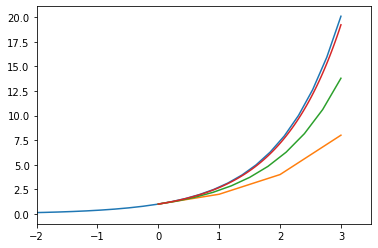

In [7]:
plt.xlim(-2,3.5)
plt.plot(x, y)

def expOde(t, y):
    return y

init = (0, 1)

t0, y0 = euler(expOde, init, 3, bound=3)
t1, y1 = euler(expOde, init, 10, bound=3)
t2, y2 = euler(expOde, init, 100, bound=3)

plt.plot(t0, y0)
plt.plot(t1, y1)
plt.plot(t2, y2)